In [1]:
pip install nixtla

In [2]:
from nixtla import NixtlaClient

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
nixtla_client = NixtlaClient(
    api_key = 'nixak-wpuxSsYvu5Eg6RWc8Hy5XgTGP49qdgsJXBSa7KDwn5aJF29BbK3StWnIM9p9KALGIQLqu4Msjng819nA'
)

In [4]:
nixtla_client.validate_api_key()

True

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('/content/los angeles.csv')
df.head()

,Date/Time,100m,120m,140m,80m
0,2020-01-01 00:00:00,3.42,3.25,3.20,3.72
1,2020-01-01 00:30:00,3.75,3.53,3.43,4.12
2,2020-01-01 01:00:00,5.36,4.96,4.65,5.96
3,2020-01-01 01:30:00,5.93,5.51,5.15,6.60
4,2020-01-01 02:00:00,5.98,5.55,5.14,6.58


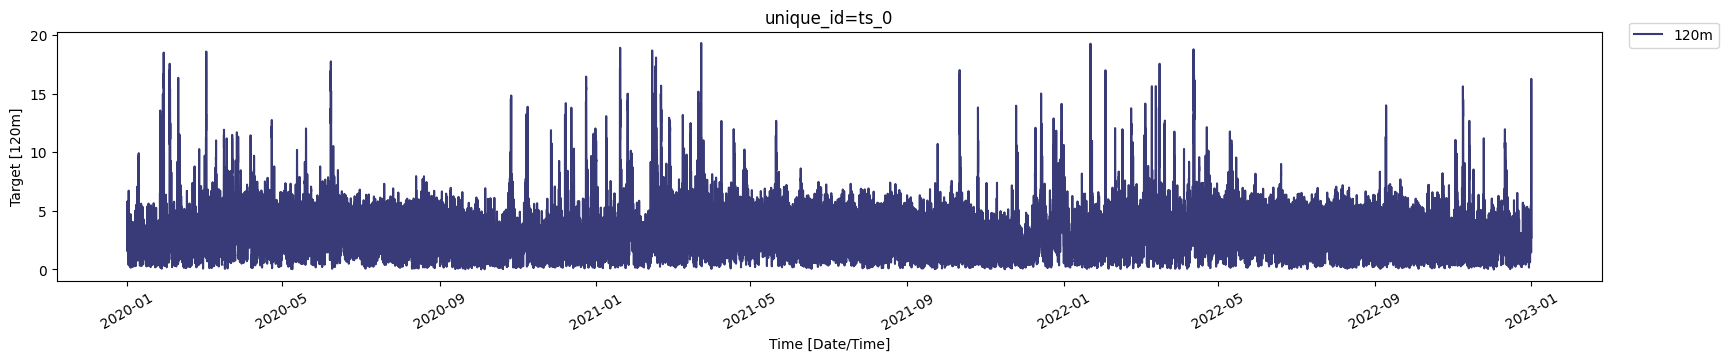

In [7]:
nixtla_client.plot(df, time_col='Date/Time', target_col='120m')


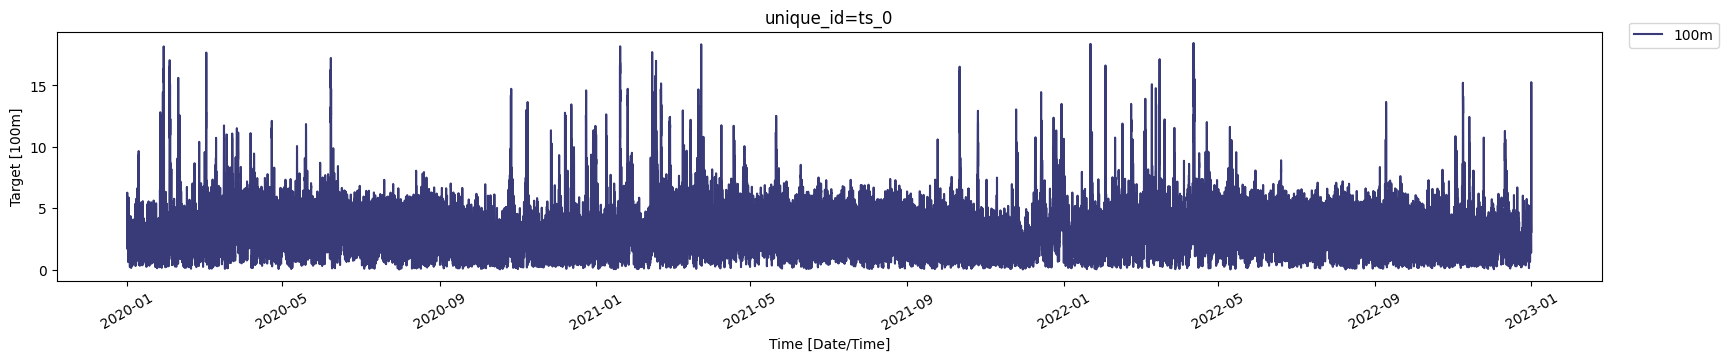

In [8]:
nixtla_client.plot(df, time_col='Date/Time', target_col='100m')


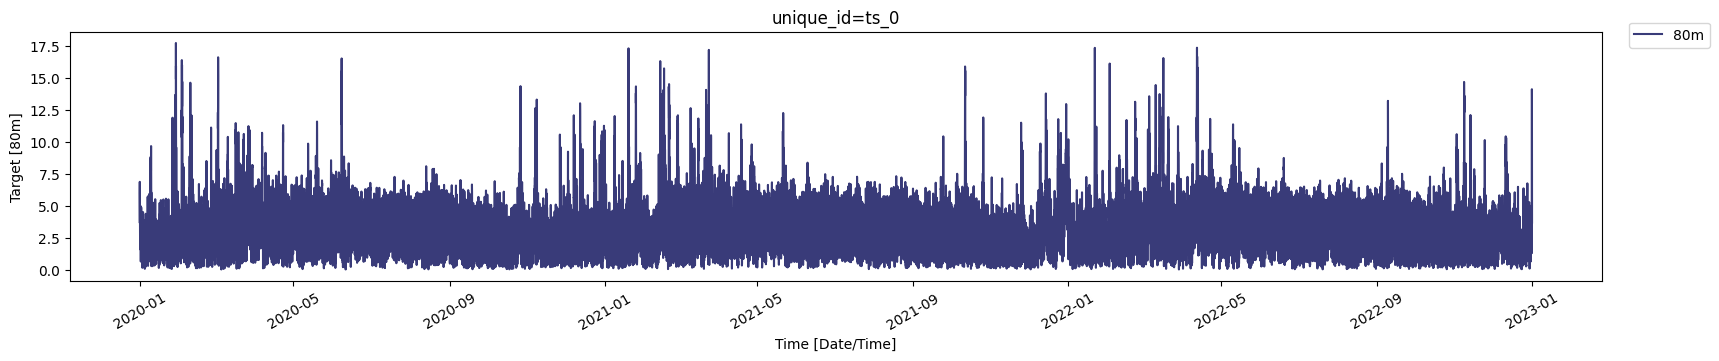

In [9]:
nixtla_client.plot(df, time_col='Date/Time', target_col='80m')


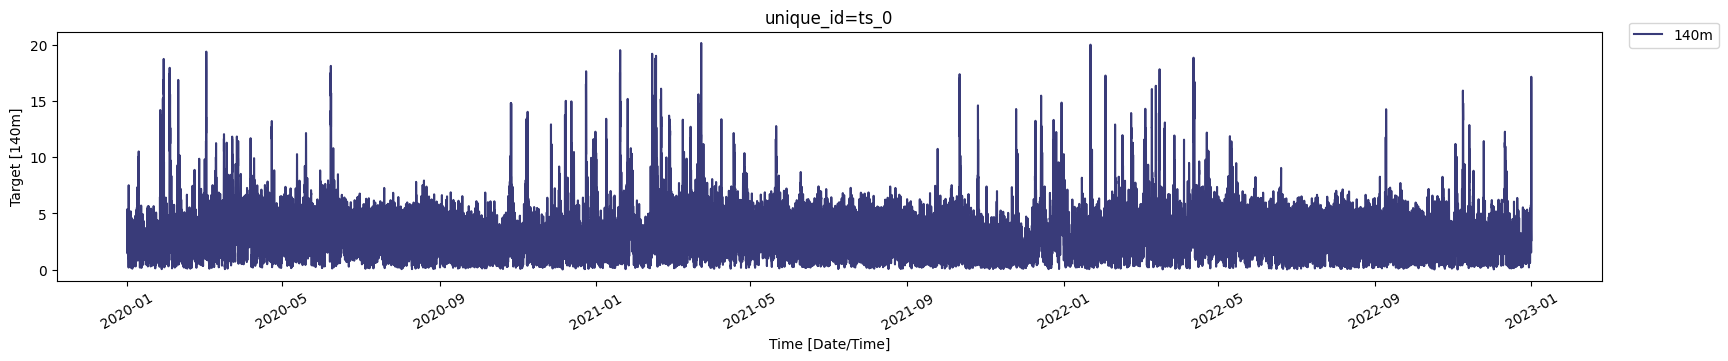

In [10]:
nixtla_client.plot(df, time_col='Date/Time', target_col='140m')


In [11]:
df.head(10)

,Date/Time,100m,120m,140m,80m
0,2020-01-01 00:00:00,3.42,3.25,3.20,3.72
1,2020-01-01 00:30:00,3.75,3.53,3.43,4.12
2,2020-01-01 01:00:00,5.36,4.96,4.65,5.96
3,2020-01-01 01:30:00,5.93,5.51,5.15,6.60
4,2020-01-01 02:00:00,5.98,5.55,5.14,6.58
5,2020-01-01 02:30:00,6.26,5.80,5.37,6.87
6,2020-01-01 03:00:00,5.53,5.08,4.67,6.14
7,2020-01-01 03:30:00,5.07,4.71,4.32,5.29
8,2020-01-01 04:00:00,4.97,4.86,4.66,4.97
9,2020-01-01 04:30:00,4.69,4.80,4.80,4.46


In [12]:
dti = pd.date_range("2014-01-01", periods=3, freq="15min")
dti

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 00:15:00',
               '2014-01-01 00:30:00'],
              dtype='datetime64[ns]', freq='15min')

In [13]:
data = df

In [14]:
data.set_index('Date/Time', inplace=True)

# Sort the data by the datetime index
data.sort_index(inplace=True)

# Split the data into training (80%) and testing (20%)
split_index = int(len(data) * 0.95)
train_data = data[:split_index]
test_data = data[split_index:]

In [15]:
train_data

,100m,120m,140m,80m
Date/Time,,,,
2020-01-01 00:00:00,3.42,3.25,3.20,3.72
2020-01-01 00:30:00,3.75,3.53,3.43,4.12
2020-01-01 01:00:00,5.36,4.96,4.65,5.96
2020-01-01 01:30:00,5.93,5.51,5.15,6.60
2020-01-01 02:00:00,5.98,5.55,5.14,6.58
...,...,...,...,...
2022-11-07 02:00:00,2.43,2.46,2.49,2.40
2022-11-07 02:30:00,3.17,3.23,3.29,3.09
2022-11-07 03:00:00,3.07,3.12,3.15,3.00


In [16]:
fcst_df = nixtla_client.forecast(
    df=train_data.reset_index(),  # Reset the index to make 'Date/Time' a column again,
    h=len(test_data),
    level=[95],
    finetune_steps=10,
    finetune_loss='mae',
    model='timegpt-1-long-horizon',
    time_col='Date/Time',
    target_col='120m'
)

/usr/local/lib/python3.11/dist-packages/nixtla/nixtla_client.py:383: UserWarning: `df` contains the following exogenous features: ['100m', '140m', '80m'], but `X_df` was not provided and they were not declared in `hist_exog_list`. They will be ignored.
  warnings.warn(


In [17]:
fcst_df.head()

,Date/Time,TimeGPT,TimeGPT-hi-95,TimeGPT-lo-95
0,2022-11-07 04:30:00,2.665713,3.974283,1.357143
1,2022-11-07 05:00:00,2.537603,4.600064,0.475143
2,2022-11-07 05:30:00,2.224980,4.548157,-0.098197
3,2022-11-07 06:00:00,1.981570,4.593567,-0.630427
4,2022-11-07 06:30:00,1.755564,4.600725,-1.089598


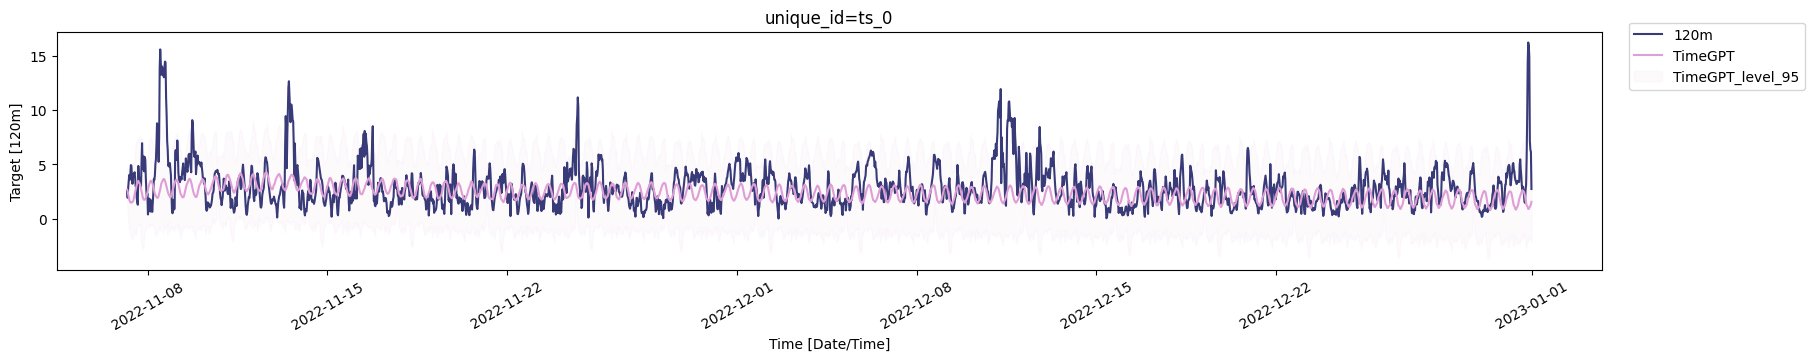

In [18]:
nixtla_client.plot(test_data.reset_index(), fcst_df, models=['TimeGPT'], level=[95], time_col='Date/Time', target_col='120m')

In [6]:
df1 = pd.read_csv('/content/los angeles.csv')
df1.head()

,Date/Time,100m,120m,140m,80m
0,2020-01-01 00:00:00,3.42,3.25,3.20,3.72
1,2020-01-01 00:30:00,3.75,3.53,3.43,4.12
2,2020-01-01 01:00:00,5.36,4.96,4.65,5.96
3,2020-01-01 01:30:00,5.93,5.51,5.15,6.60
4,2020-01-01 02:00:00,5.98,5.55,5.14,6.58


In [7]:
df1.head(1)

,Date/Time,100m,120m,140m,80m
0,2020-01-01 00:00:00,3.42,3.25,3.2,3.72


In [8]:
df1.head(-1)

,Date/Time,100m,120m,140m,80m
0,2020-01-01 00:00:00,3.42,3.25,3.20,3.72
1,2020-01-01 00:30:00,3.75,3.53,3.43,4.12
2,2020-01-01 01:00:00,5.36,4.96,4.65,5.96
3,2020-01-01 01:30:00,5.93,5.51,5.15,6.60
4,2020-01-01 02:00:00,5.98,5.55,5.14,6.58
...,...,...,...,...,...
52602,2022-12-31 21:00:00,14.95,15.95,16.84,13.80
52603,2022-12-31 21:30:00,14.10,14.94,15.65,13.07
52604,2022-12-31 22:00:00,6.46,7.17,7.82,5.67
52605,2022-12-31 22:30:00,6.49,6.35,5.97,6.39


In [9]:
df1['Date/Time'] = pd.to_datetime(df1['Date/Time'])

# Set the 'Date/Time' column as the index
df1.set_index('Date/Time', inplace=True)

# Sort the data by the datetime index
df1.sort_index(inplace=True)

# Resample the data to one-day intervals by taking the mean
df1 = df1.resample('H').mean()

<ipython-input-9-03367d1038ab>:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df1 = df1.resample('H').mean()


In [10]:
df1.head(10)

,100m,120m,140m,80m
Date/Time,,,,
2020-01-01 00:00:00,3.585,3.390,3.315,3.920
2020-01-01 01:00:00,5.645,5.235,4.900,6.280
2020-01-01 02:00:00,6.120,5.675,5.255,6.725
2020-01-01 03:00:00,5.300,4.895,4.495,5.715
2020-01-01 04:00:00,4.830,4.830,4.730,4.715
2020-01-01 05:00:00,4.970,4.790,4.585,5.075
2020-01-01 06:00:00,3.330,3.100,2.925,3.620
2020-01-01 07:00:00,2.525,2.305,2.155,2.820
2020-01-01 08:00:00,1.830,1.700,1.610,2.035


In [11]:
df1 = df1.reset_index()

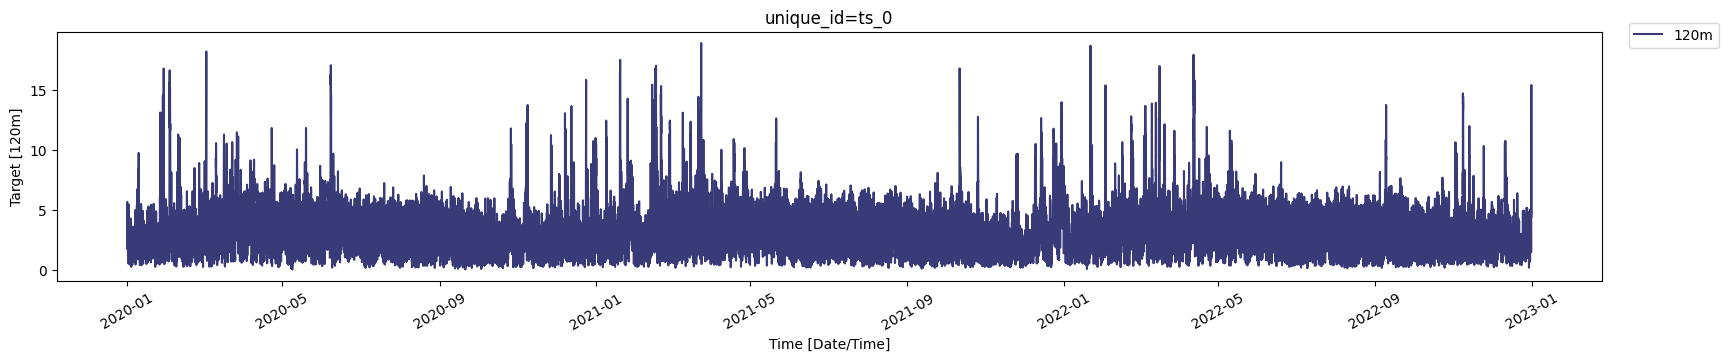

In [12]:
nixtla_client.plot(df1, time_col='Date/Time', target_col='120m')


In [13]:
df1.set_index('Date/Time', inplace=True)

# Sort the data by the datetime index
df1.sort_index(inplace=True)

# Split the data into training (80%) and testing (20%)
split_index = int(len(df1) * 0.8)
train_data = df1[:split_index]
test_data = df1[split_index:]

In [14]:

train_data

,100m,120m,140m,80m
Date/Time,,,,
2020-01-01 00:00:00,3.585,3.390,3.315,3.920
2020-01-01 01:00:00,5.645,5.235,4.900,6.280
2020-01-01 02:00:00,6.120,5.675,5.255,6.725
2020-01-01 03:00:00,5.300,4.895,4.495,5.715
2020-01-01 04:00:00,4.830,4.830,4.730,4.715
...,...,...,...,...
2022-05-26 14:00:00,5.265,5.220,5.155,5.280
2022-05-26 15:00:00,6.210,6.185,6.130,6.195
2022-05-26 16:00:00,5.960,5.940,5.900,5.930


In [15]:
import time
start_time = time.time()

fcst_df = nixtla_client.forecast(
    df=train_data.reset_index(),  # Reset the index to make 'Date/Time' a column again,
    h=len(test_data),
    level=[95],
    finetune_steps=5,
    finetune_loss='rmse',
    finetune_depth=2,
    model='timegpt-1-long-horizon',
    time_col='Date/Time',
    target_col='120m'
)

end_time = time.time()
print(f'Training Time: {end_time - start_time:.2f} seconds')

/usr/local/lib/python3.11/dist-packages/nixtla/nixtla_client.py:383: UserWarning: `df` contains the following exogenous features: ['100m', '140m', '80m'], but `X_df` was not provided and they were not declared in `hist_exog_list`. They will be ignored.
  warnings.warn(


Training Time: 3.28 seconds


In [16]:
fcst_df.head(10)

,Date/Time,TimeGPT,TimeGPT-hi-95,TimeGPT-lo-95
0,2022-05-26 19:00:00,3.740104,5.558545,1.921663
1,2022-05-26 20:00:00,3.467541,6.094787,0.840296
2,2022-05-26 21:00:00,3.016236,5.832106,0.200366
3,2022-05-26 22:00:00,2.794673,5.422491,0.166855
4,2022-05-26 23:00:00,2.707593,5.994541,-0.579356
5,2022-05-27 00:00:00,2.602173,5.627327,-0.422981
6,2022-05-27 01:00:00,2.440493,5.734595,-0.853610
7,2022-05-27 02:00:00,2.256028,5.106998,-0.594941
8,2022-05-27 03:00:00,2.120164,4.762594,-0.522266
9,2022-05-27 04:00:00,1.948689,4.468866,-0.571488


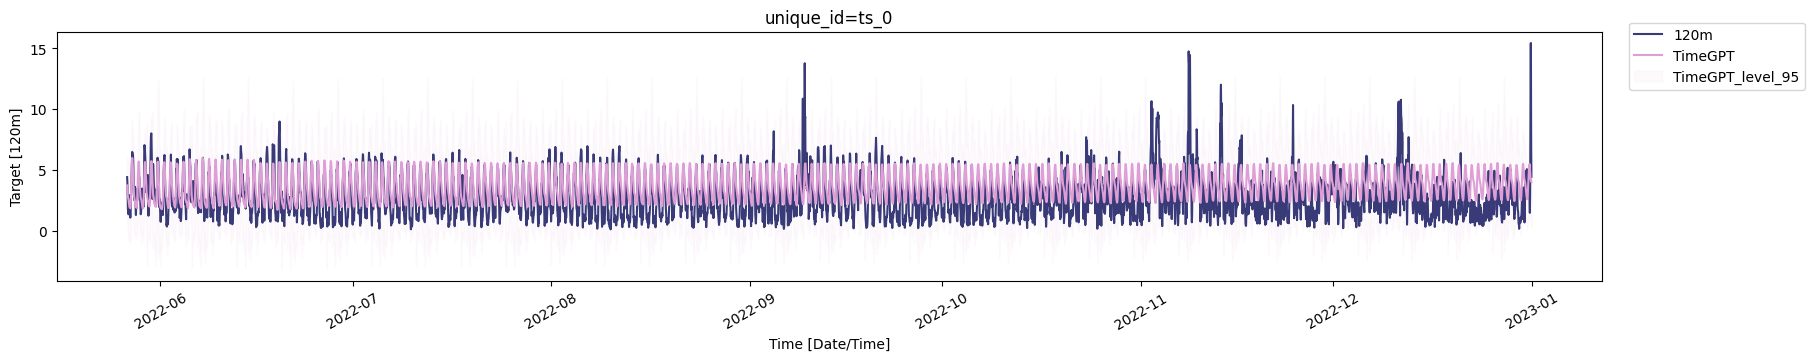

In [17]:
nixtla_client.plot(test_data.reset_index(), fcst_df, models=['TimeGPT'], level=[95], time_col='Date/Time', target_col='120m')

In [18]:
from nixtla import NixtlaClient

from utilsforecast.losses import mse,mae,rmse

In [19]:
test_data = test_data.reset_index()

In [20]:
test_data['unique_id'] = 'a'

In [21]:
test = test_data.copy()

test.loc[:, 'TimeGPT'] = fcst_df['TimeGPT'].values

In [22]:
test

,Date/Time,100m,120m,140m,80m,unique_id,TimeGPT
0,2022-05-26 19:00:00,4.475,4.425,4.355,4.485,a,3.740104
1,2022-05-26 20:00:00,4.015,3.995,3.955,4.010,a,3.467541
2,2022-05-26 21:00:00,2.885,2.845,2.785,2.905,a,3.016236
3,2022-05-26 22:00:00,1.790,1.755,1.710,1.815,a,2.794673
4,2022-05-26 23:00:00,1.910,1.855,1.780,1.955,a,2.707593
...,...,...,...,...,...,...,...
5256,2022-12-31 19:00:00,7.280,7.480,7.565,6.885,a,4.500183
5257,2022-12-31 20:00:00,14.320,15.370,16.310,13.115,a,4.246499
5258,2022-12-31 21:00:00,14.525,15.445,16.245,13.435,a,4.136011
5259,2022-12-31 22:00:00,6.475,6.760,6.895,6.030,a,4.056438


In [23]:
evaluation = rmse(test, models=['TimeGPT'],id_col='unique_id', target_col='120m')

print(evaluation)

  unique_id   TimeGPT
0         a  1.621238


In [24]:
# Add the prediction intervals to the test dataframe
test['TimeGPT-hi-95'] = fcst_df['TimeGPT-hi-95'].values
test['TimeGPT-lo-95'] = fcst_df['TimeGPT-lo-95'].values

# Calculate PICP: Proportion of actual values within the prediction interval
test['Within_Interval'] = (test['120m'] >= test['TimeGPT-lo-95']) & (test['120m'] <= test['TimeGPT-hi-95'])
PICP = test['Within_Interval'].mean()

# Calculate MPIW: Mean width of the prediction intervals
test['Interval_Width'] = test['TimeGPT-hi-95'] - test['TimeGPT-lo-95']
MPIW = test['Interval_Width'].mean()

# Print the results
print(f"PICP: {PICP}")
print(f"MPIW: {MPIW}")


PICP: 0.9517202052841665
MPIW: 6.519082942398222
